In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('aac_intakes_outcomes.csv')

In [3]:
df = data[['animal_id_intake','animal_id_outcome','animal_type','breed','color','age_upon_intake_(years)',
           'age_upon_intake_age_group','intake_monthyear','sex_upon_intake','intake_condition',
           'intake_type','age_upon_outcome_(years)','age_upon_outcome_age_group','outcome_monthyear',
           'sex_upon_outcome','time_in_shelter_days','outcome_type']]

In [4]:
df1 = df.drop('animal_id_intake', axis = 1)

In [5]:
df1 = df1.drop('animal_id_outcome', axis = 1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# use decision tree to see what kind of animals have a higher possibility of getting a positive outcome

df1_decision_tree = df1[['intake_condition','intake_type','age_upon_outcome_age_group','sex_upon_outcome',
                         'time_in_shelter_days','outcome_type']]

In [9]:
# nominal attributes to numeric attributes
for x in range(len(df1_decision_tree['age_upon_outcome_age_group'])):
    if df1_decision_tree.age_upon_outcome_age_group[x] == '(0, 2.5]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 0
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(2.5, 5.0]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 1
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(5.0, 7.5]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 2
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(7.5, 10.0]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 3
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(10.0, 12.5]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 4
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(12.5, 15.0]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 5
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(15.0, 17.5]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 6
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(17.5, 20.0]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 7
    elif df1_decision_tree.age_upon_outcome_age_group[x] == '(20.0, 22.5]':
        df1_decision_tree.age_upon_outcome_age_group[x] = 8
    else:
        df1_decision_tree.age_upon_outcome_age_group[x] = 9

<ipython-input-9-7c42b00c1e84>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_decision_tree.age_upon_outcome_age_group[x] = 3
<ipython-input-9-7c42b00c1e84>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_decision_tree.age_upon_outcome_age_group[x] = 2
<ipython-input-9-7c42b00c1e84>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_decision_tree.age_upon_outcome_age_group[x] = 6
<ipython-input-9-7c42b00c1e84>:14: Settin

In [10]:
intake_condition_dummy = pd.get_dummies(df1_decision_tree['intake_condition'])

In [11]:
intake_type_dummy = pd.get_dummies(df1_decision_tree['intake_type'])

In [12]:
sex_upon_outcome_dummy = pd.get_dummies(df1_decision_tree['sex_upon_outcome'])

In [13]:
df1_decision_tree = pd.concat([df1_decision_tree, intake_condition_dummy], axis = 1)

In [14]:
df1_decision_tree = pd.concat([df1_decision_tree, intake_type_dummy], axis = 1)

In [15]:
df1_decision_tree = pd.concat([df1_decision_tree, sex_upon_outcome_dummy], axis = 1)

In [16]:
df1_decision_tree = df1_decision_tree.drop(['intake_condition','intake_type','sex_upon_outcome'], axis = 1)

In [17]:
# data for constructing decision tree
df1_decision_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79661 entries, 0 to 79660
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome_age_group  79661 non-null  object 
 1   time_in_shelter_days        79661 non-null  float64
 2   outcome_type                79661 non-null  object 
 3   Aged                        79661 non-null  uint8  
 4   Feral                       79661 non-null  uint8  
 5   Injured                     79661 non-null  uint8  
 6   Normal                      79661 non-null  uint8  
 7   Nursing                     79661 non-null  uint8  
 8   Other                       79661 non-null  uint8  
 9   Pregnant                    79661 non-null  uint8  
 10  Sick                        79661 non-null  uint8  
 11  Euthanasia Request          79661 non-null  uint8  
 12  Owner Surrender             79661 non-null  uint8  
 13  Public Assist               796

In [18]:
X = df1_decision_tree.drop('outcome_type', axis = 1)
y = df1_decision_tree['outcome_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
dtree = DecisionTreeClassifier(criterion="entropy", random_state = 0, min_samples_split = 700, min_samples_leaf = 350)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=350,
                       min_samples_split=700, random_state=0)

In [20]:
dtree.score(X_test,y_test)

0.750203979162744

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
predictions = dtree.predict(X_test)
accuracy_score(y_test, predictions)

0.750203979162744

In [23]:
confusion_matrix(y_test, predictions)

array([[6309,    0,    0,    0,    0,    0,   93,    0,  358],
       [  10,    0,    0,   29,    0,    0,   12,    0,   83],
       [   1,    0,    0,   38,    0,    0,    1,    0,   17],
       [ 112,    0,    0,  778,    0,    0,   91,    0,  296],
       [   6,    0,    0,    0,    0,    0,    1,    0,    5],
       [   0,    0,    0,    1,    0,    0,    0,    0,    1],
       [ 430,    0,    0,   41,    0,    0, 2014,    0,  426],
       [  21,    0,    0,    0,    0,    0,    3,    0,    4],
       [1600,    0,    0,   34,    0,    0,  266,    0, 2852]])

In [24]:
# visiualize confusion matrix
pd.crosstab(y_test, predictions)

col_0,Adoption,Euthanasia,Return to Owner,Transfer
outcome_type,,,,
Adoption,6309,0,93,358
Died,10,29,12,83
Disposal,1,38,1,17
Euthanasia,112,778,91,296
Missing,6,0,1,5
Relocate,0,1,0,1
Return to Owner,430,41,2014,426
Rto-Adopt,21,0,3,4
Transfer,1600,34,266,2852


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, predictions))

/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

       Adoption       0.74      0.93      0.83      6760
           Died       0.00      0.00      0.00       134
       Disposal       0.00      0.00      0.00        57
     Euthanasia       0.84      0.61      0.71      1277
        Missing       0.00      0.00      0.00        12
       Relocate       0.00      0.00      0.00         2
Return to Owner       0.81      0.69      0.75      2911
      Rto-Adopt       0.00      0.00      0.00        28
       Transfer       0.71      0.60      0.65      4752

       accuracy                           0.75     15933
      macro avg       0.35      0.31      0.33     15933
   weighted avg       0.74      0.75      0.74     15933



/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn import tree

In [28]:
dtree.get_depth()

17

In [29]:
dtree.get_n_leaves()

135

In [30]:
# try different depth for decision tree
max_depth_range = list(range(1, dtree.get_depth() ))
accuracy = []
for depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth = depth, criterion="entropy", random_state = 0, min_samples_split = 700, min_samples_leaf = 350)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    accuracy.append(score)

In [31]:
max_index = accuracy.index(max(accuracy))
max_index

8

In [32]:
accuracy[8]

0.750203979162744

In [33]:
# try different number of leaves for decision tree
max_leaves_range = list(range(2, dtree.get_n_leaves()))
accuracy1 = []
for leaves in max_leaves_range:
    dt = DecisionTreeClassifier(max_depth = max_index+1, criterion="entropy", random_state = 0, max_leaf_nodes = leaves, 
                                min_samples_split = 700, min_samples_leaf = 350)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    accuracy1.append(score)

In [35]:
max_leaves_index = accuracy1.index(max(accuracy1))
max_leaves_index

41

In [38]:
accuracy1[41]

0.750203979162744

In [39]:
final_dtree = DecisionTreeClassifier(max_depth = max_index+1, criterion="entropy", random_state = 0, max_leaf_nodes = max_leaves_index+2,
                                     min_samples_split = 700, min_samples_leaf = 350)
final_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=43,
                       min_samples_leaf=350, min_samples_split=700,
                       random_state=0)

In [40]:
final_dtree.score(X_test, y_test)

0.750203979162744

In [41]:
final_predictions = final_dtree.predict(X_test)
accuracy_score(y_test, final_predictions)

0.750203979162744

In [42]:
confusion_matrix(y_test, final_predictions)

array([[6309,    0,    0,    0,    0,    0,   93,    0,  358],
       [  10,    0,    0,   29,    0,    0,   12,    0,   83],
       [   1,    0,    0,   38,    0,    0,    1,    0,   17],
       [ 112,    0,    0,  778,    0,    0,   91,    0,  296],
       [   6,    0,    0,    0,    0,    0,    1,    0,    5],
       [   0,    0,    0,    1,    0,    0,    0,    0,    1],
       [ 430,    0,    0,   41,    0,    0, 2014,    0,  426],
       [  21,    0,    0,    0,    0,    0,    3,    0,    4],
       [1600,    0,    0,   34,    0,    0,  266,    0, 2852]])

In [43]:
print(classification_report(y_test, final_predictions))

/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

       Adoption       0.74      0.93      0.83      6760
           Died       0.00      0.00      0.00       134
       Disposal       0.00      0.00      0.00        57
     Euthanasia       0.84      0.61      0.71      1277
        Missing       0.00      0.00      0.00        12
       Relocate       0.00      0.00      0.00         2
Return to Owner       0.81      0.69      0.75      2911
      Rto-Adopt       0.00      0.00      0.00        28
       Transfer       0.71      0.60      0.65      4752

       accuracy                           0.75     15933
      macro avg       0.35      0.31      0.33     15933
   weighted avg       0.74      0.75      0.74     15933



/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# text version of the decision tree
tree.export_text(final_dtree)

'|--- feature_1 <= 3.87\n|   |--- feature_14 <= 0.50\n|   |   |--- feature_11 <= 0.50\n|   |   |   |--- feature_0 <= 0.50\n|   |   |   |   |--- feature_17 <= 0.50\n|   |   |   |   |   |--- feature_18 <= 0.50\n|   |   |   |   |   |   |--- feature_4 <= 0.50\n|   |   |   |   |   |   |   |--- feature_19 <= 0.50\n|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50\n|   |   |   |   |   |   |   |   |   |--- class: Transfer\n|   |   |   |   |   |   |   |   |--- feature_5 >  0.50\n|   |   |   |   |   |   |   |   |   |--- class: Transfer\n|   |   |   |   |   |   |   |--- feature_19 >  0.50\n|   |   |   |   |   |   |   |   |--- feature_1 <= 0.04\n|   |   |   |   |   |   |   |   |   |--- class: Transfer\n|   |   |   |   |   |   |   |   |--- feature_1 >  0.04\n|   |   |   |   |   |   |   |   |   |--- class: Transfer\n|   |   |   |   |   |   |--- feature_4 >  0.50\n|   |   |   |   |   |   |   |--- class: Euthanasia\n|   |   |   |   |   |--- feature_18 >  0.50\n|   |   |   |   |   |   |--- feature

In [148]:
#!pip install pydotplus

In [45]:
import graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

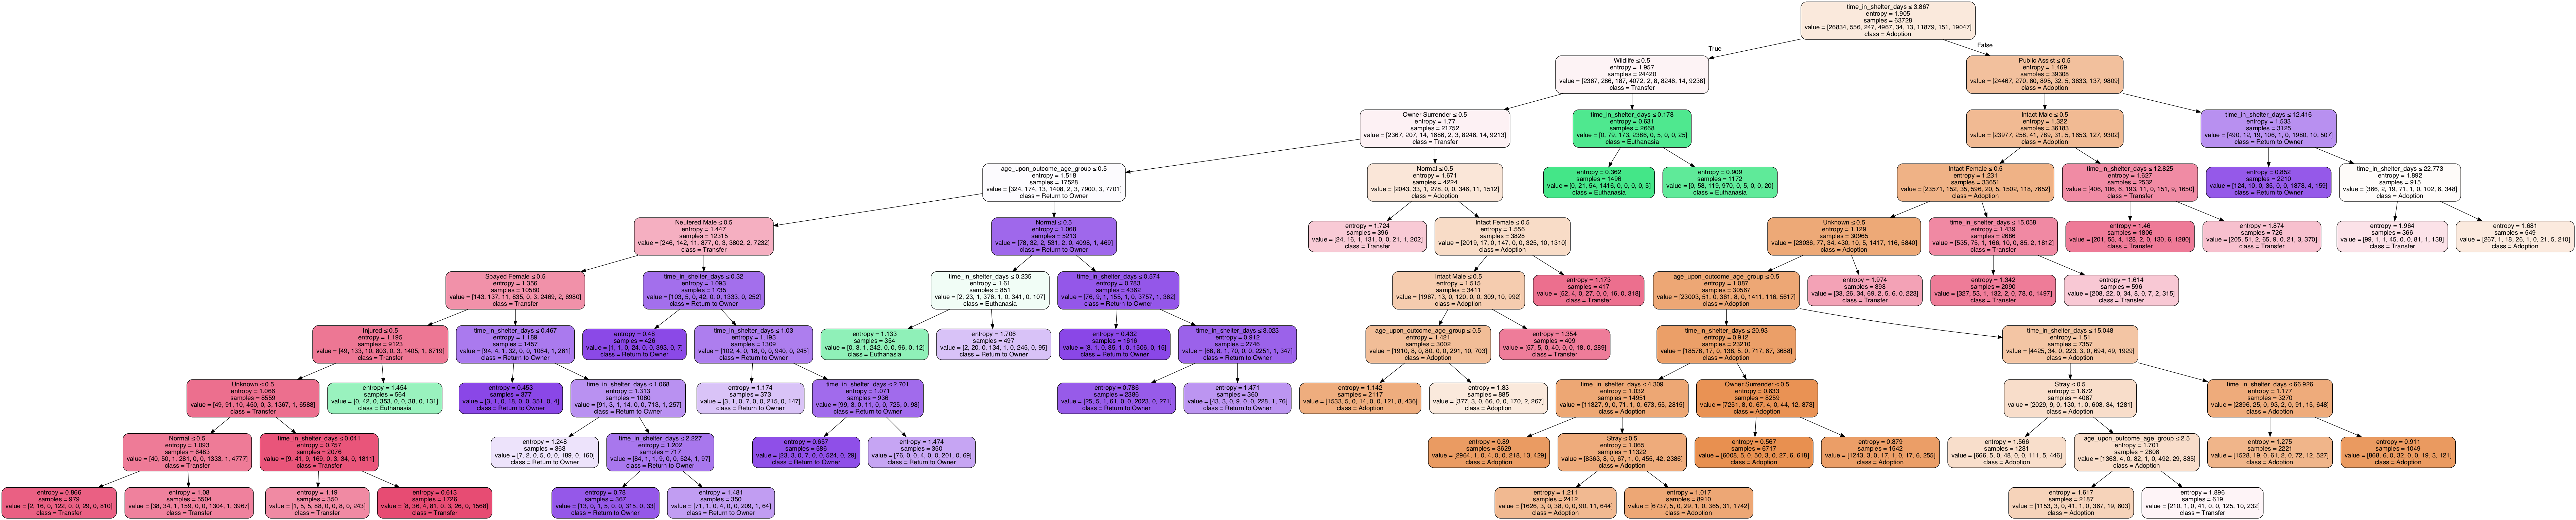

In [46]:
# visualize the decision tree and save it as a pdf file
dot_data = StringIO()  

fn=['age_upon_outcome_age_group','time_in_shelter_days','Aged','Feral','Injured','Normal','Nursing','Other',
   'Pregnant','Sick','Euthanasia Request','Owner Surrender','Public Assist','Stray','Wildlife','Intact Female',
   'Intact Male','Neutered Male','Spayed Female','Unknown']
cn = ['Adoption','Died','Disposal','Euthanasia','Missing','Relocate','Return to Owner','Rto-Adopt','Transfer']
tree.export_graphviz(final_dtree, out_file = dot_data, feature_names = fn, class_names = cn, filled = True,
                                rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
graph.write_pdf("decision_tree8.pdf")

True

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# construct random forest
rf = RandomForestClassifier(criterion="entropy", random_state = 0, min_samples_split = 700, min_samples_leaf = 350)

In [50]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=350,
                       min_samples_split=700, random_state=0)

In [51]:
rf.score(X_test, y_test)

0.7427352036653486

In [52]:
rf_predictions = rf.predict(X_test)

In [53]:
print(classification_report(y_test, rf_predictions))

/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

       Adoption       0.74      0.94      0.83      6760
           Died       0.00      0.00      0.00       134
       Disposal       0.00      0.00      0.00        57
     Euthanasia       0.89      0.50      0.64      1277
        Missing       0.00      0.00      0.00        12
       Relocate       0.00      0.00      0.00         2
Return to Owner       0.82      0.67      0.74      2911
      Rto-Adopt       0.00      0.00      0.00        28
       Transfer       0.69      0.61      0.64      4752

       accuracy                           0.74     15933
      macro avg       0.35      0.30      0.32     15933
   weighted avg       0.74      0.74      0.73     15933



/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
accuracy_score(y_test, rf_predictions)

0.7427352036653486

In [55]:
confusion_matrix(y_test, rf_predictions)

array([[6369,    0,    0,    0,    0,    0,  102,    0,  289],
       [  13,    0,    0,   24,    0,    0,    9,    0,   88],
       [   0,    0,    0,   46,    0,    0,    1,    0,   10],
       [ 128,    0,    0,  639,    0,    0,   95,    0,  415],
       [   6,    0,    0,    0,    0,    0,    1,    0,    5],
       [   0,    0,    0,    2,    0,    0,    0,    0,    0],
       [ 468,    0,    0,    1,    0,    0, 1941,    0,  501],
       [  24,    0,    0,    0,    0,    0,    3,    0,    1],
       [1641,    0,    0,    9,    0,    0,  217,    0, 2885]])

In [56]:
import seaborn as sns

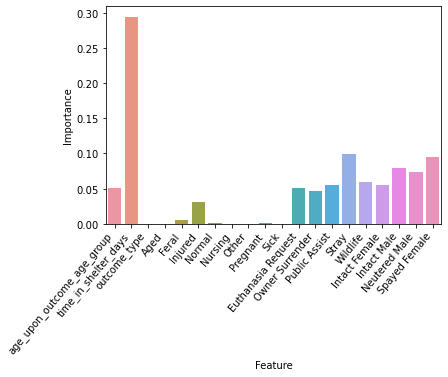

In [57]:
feature_importance = pd.DataFrame({'Feature':df1_decision_tree.columns[:-1],'Importance':rf.feature_importances_.tolist()})

#plt.subplots(figsize = (8, 6))
g = sns.barplot(data = feature_importance, x = 'Feature', y = 'Importance')
labels = g.get_xticklabels()
g.set_xticklabels(labels, rotation = 50, horizontalalignment = 'right')
plt.show(g)